# Game of Life by Piotr Pogwizd

In [1]:
import cython 
%load_ext cython

In [7]:
%%cython -a 
cimport cython 
import numpy as np 
cimport numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3
from IPython.display import HTML
import argparse
from jupyterthemes import jtplot
from matplotlib import rcParams
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)


cdef Rules(int i, int j, double[:,:] X):
    # The number of neighbors of the cell
    cdef int neighbours = np.sum(X[i - 1 : i + 2, j - 1 : j + 2]) - X[i, j]
    
    # Game rules:
    #########################################
    if X[i, j] and not 2 <= neighbours <= 3:
        return 0
    elif neighbours == 3:
        return 1
    return X[i, j]
    #########################################

    
# A function that generates a new X matrix based on the above rules:
cpdef Generation(double[:,:] X):
    
    cpdef int i,j
    cpdef double[:,:] new_X
    new_X = np.copy(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            new_X[i, j] = Rules(i, j, X)
    return new_X


cpdef GameOfLife(long[:,:] Y, int n, int iterations):

    # Initial conditions:
    #################################################################
    X = np.zeros((Y.shape[0]+n,Y.shape[1]+n))
    X[int(n/2):int(n/2+Y.shape[0]),int(n/2):int(n/2+Y.shape[1])] = Y
    #################################################################
    
    fig = plt.figure(figsize = (10,10))
    
    steps = []
    
    cdef int i
    
    for i in range(iterations):
        steps.append((plt.imshow(X, cmap="gnuplot"),))
        X = Generation(X)
        
    animacja = animation.ArtistAnimation(fig, steps, interval=150, repeat_delay=2000, blit=True)
    plt.rcParams['animation.html'] = 'html5'
    return animacja

### Some sample starter kits

In [4]:
Y = [
    np.array([
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 1, 1]]
    ),
    np.array([
        [1, 1, 0],
        [1, 0, 1],
        [0, 1, 0]]
    ),
    
    np.array([
        [0, 1, 1],
        [1, 1, 0],
        [0, 1, 0]]
    ),
    
    np.array([
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1]]
    ),
    
    np.array([
        [1, 1, 0, 0],
        [1, 1, 0, 0], 
        [0, 0, 1, 1],
        [0, 0, 1, 1]]
    ),
    
    np.array([
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [1, 1, 0, 0, 1, 1, 1]]
    ),
    
    np.array([
        [0, 0, 1, 1, 0],
        [1, 1, 0, 1, 1], 
        [1, 1, 1, 1, 0], 
        [0, 1, 1, 0, 0]]
    ),
    
    np.array([
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0]]
    ),
    
    np.array([
        [1, 1, 1, 0, 1],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1],
        [0, 1, 1, 0, 1],
        [1, 0, 1, 0, 1]]
    ),
    # Gosper Glider Gun
    np.array([
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
        [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
        [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [1,1,0,0,0,0,0,0,0,0,1, 0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
    )
]

### Some examples of operation

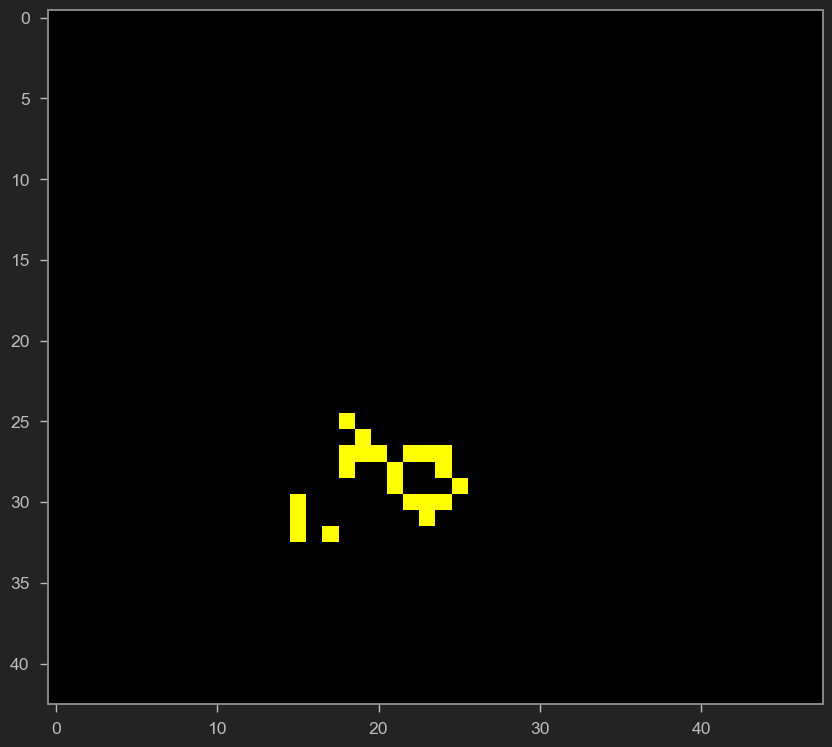

In [5]:
n = 40 # The dimensions of the board increased by the dimensions of the initial matrix
iterations = 100
GameOfLife(Y[0], n, iterations)

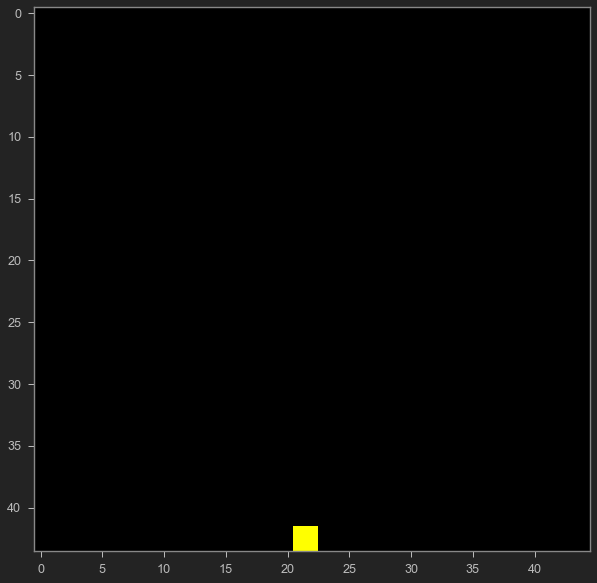

In [5]:
n = 40 
iterations = 150
GameOfLife(Y[6], n, iterations)

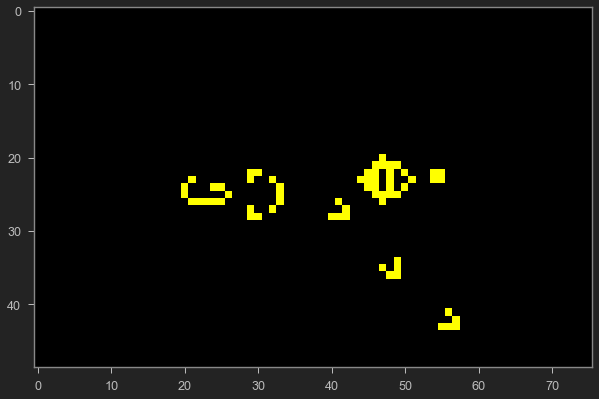

In [8]:
from matplotlib.animation import PillowWriter
n = 40 
iterations = 200
anim = GameOfLife(Y[9], n, iterations)
writer = PillowWriter(fps=20)
anim.save("savedGif.gif", writer=writer)